#**PELATIHAN AI 2023**

In [ ]:
# Download data dari google drive
! gdown --id 1cujoqQlNl47u0cpbp3ARiJsm1_ZDmvZs
! gdown --id 1NUbQQeB-p2GHGVN1KP30VWqdaeaB6Nla
! gdown --id 14LDEHrEyBmA74Zp_J6OfumSBgVwfZVcH

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1cujoqQlNl47u0cpbp3ARiJsm1_ZDmvZs
To: /content/data.csv
100% 77.0/77.0 [00:00<00:00, 92.9kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1NUbQQeB-p2GHGVN1KP30VWqdaeaB6Nla
To: /content/data2.csv
100% 131/131 [00:00<00:00, 226kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.g

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#**1. LINEAR REGRESSION**

## **a. Single Variable**

In [ ]:
# Read data
df = pd.read_csv('data.csv')
# Print data
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


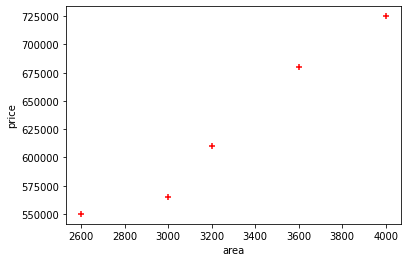

In [ ]:
# Plotting points 
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
# Membuat persamaan linear 
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

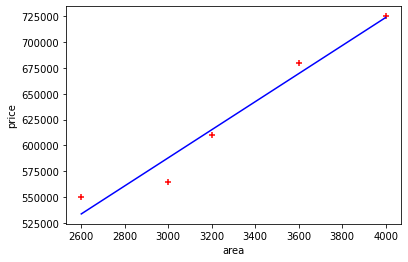

In [ ]:
# Plotting points dengan garis dari persamaan linear
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [ ]:
# Print slope and intecept value
print("Slope     : ", reg.coef_) #gradien (m)
print("Intercept : ", reg.intercept_) #b

Slope     :  [135.78767123]
Intercept :  180616.43835616432


In [ ]:
# Predict value price dr persamaan regresi
x = 3300
price = reg.predict([[x]])

print("Calculation: ")
print("    y = mx + b")
print("price = slope*x + intercept")
print("price =",reg.coef_,"*", x,"+",reg.intercept_)
print("price =",price)

Calculation: 
    y = mx + b
price = slope*x + intercept
price = [135.78767123] * 3300 + 180616.43835616432
price = [628715.75342466]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# **b. Multiple Variable**

In [ ]:
# Read data
df = pd.read_csv('data2.csv')
df

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [ ]:
# Membuat persamaan linear
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns').values,df.price.values)

LinearRegression()

In [ ]:
# Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

array([498408.25158031])

#**2. GRADIENT DESCENT**

In [ ]:
import math
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x) 
    learning_rate = 0.009
    cost = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        
        cost0 = cost
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        close = math.isclose(cost0, cost, rel_tol=1e-15, abs_tol=1e-15)
      
        
        if close == True:
          break

        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd


        # Uncomment to print every iteration
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

        # # Uncomment to print graph for first 30 iteration
        # if(i == iterations-1 or i < 30):
        #   plot_graph(y_predicted,x,y)
        #   print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

def plot_graph(y_predict,x,y):
    print("\nGraph: ")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x,y,color='red',marker='+')

    plt.plot(x, y_predict, color='blue')
    plt.grid()
    plt.show()

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 0.5579999999999999, b 0.16199999999999998, cost 89.0 iteration 0
m 0.9967679999999999, b 0.290952, cost 55.481624000000004 iteration 1
m 1.341696528, b 0.393889392, cost 34.716981829184014 iteration 2
m 1.612770588288, b 0.476347770432, cost 21.85248054482452 iteration 3
m 1.825719232203648, b 0.542683898796672, cost 13.881627575374338 iteration 4
m 1.9929218936923054, b 0.5963267500793349, cost 8.942091688509995 iteration 5
m 2.124121714236945, b 0.6399750863185224, cost 5.880276916613507 iteration 6
m 2.2269869601568297, b 0.675752962195994, cost 3.9816037650253047 iteration 7
m 2.307552882087194, b 0.7053321130279974, cost 2.8034355550464336 iteration 8
m 2.3705694773304176, b 0.730028279360785, cost 2.0715869071550657 iteration 9
m 2.4197751937335124, b 0.7508770185564483, cost 1.616217320887471 iteration 10
m 2.4581123463722285, b 0.7686933717608225, cost 1.3321213200758466 iteration 11
m 2.487896659715443, b 0.7841188243650273, cost 1.1541307204781102 iteration 12
m 2.510950704

Streaming output truncated to the last 5000 lines.
m 1.3578808402909688, b 18.061505501213883, cost 1.8681506853382182 iteration 308123
m 1.3578808401332019, b 18.061505506500918, cost 1.8681506853381837 iteration 308124
m 1.3578808399754396, b 18.061505511787754, cost 1.8681506853381578 iteration 308125
m 1.3578808398176847, b 18.061505517074387, cost 1.8681506853381262 iteration 308126
m 1.3578808396599347, b 18.061505522360818, cost 1.8681506853380931 iteration 308127
m 1.3578808395021917, b 18.061505527647046, cost 1.8681506853380658 iteration 308128
m 1.3578808393444535, b 18.061505532933072, cost 1.8681506853380325 iteration 308129
m 1.3578808391867228, b 18.061505538218896, cost 1.868150685338004 iteration 308130
m 1.3578808390289971, b 18.061505543504516, cost 1.8681506853379717 iteration 308131
m 1.357880838871278, b 18.061505548789935, cost 1.8681506853379446 iteration 308132
m 1.3578808387135644, b 18.061505554075154, cost 1.8681506853379088 iteration 308133
m 1.357880838555

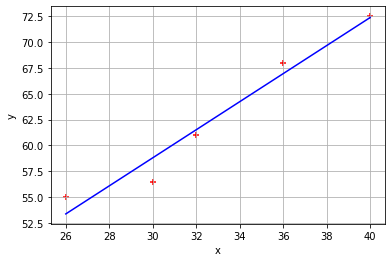

In [71]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10**6
    n = len(x)
    learning_rate = 0.0009
    cost = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        
        cost0 = cost
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        close = math.isclose(cost0, cost, rel_tol=1e-15, abs_tol=1e-15)
        if close == True:
          plot_graph(y_predicted,x,y)
          break
        
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        # Uncomment to print every iteration
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
        if close == True:
          plot_graph(y_predicted, x, y)
          break

        # # Uncomment to print graph for first 30 iteration
        # if(i == iterations-1 or i < 30):
        #   plot_graph(y_predicted,x,y)
        #   print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

def plot_graph(y_predict,x,y):
    print("\nGraph: ")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x,y,color='red',marker='+')

    plt.plot(x, y_predict, color='blue')
    plt.grid()
    plt.show()

x = np.array([26, 30, 32, 36, 40])
y = np.array([55, 56.5, 61, 68, 72.5])

gradient_descent(x,y)

#**3. LOGISTIC REGRESSION**

In [ ]:
# Read data
df = pd.read_csv('data3.csv')
df

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


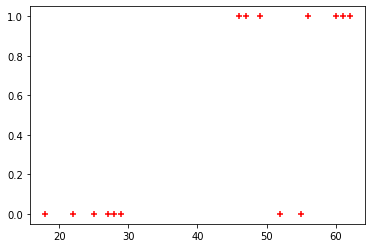

In [ ]:
# Plotting points 
plt.scatter(df.age,df.insurance,color='red',marker='+')

In [ ]:
# Bagi value x menjadi training dan testing variable
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.insurance,train_size=0.8)
X_train

,age
12,27
6,55
11,28
8,62
4,46
5,56
7,60
1,25
14,49
13,29


In [ ]:
# Print test value
X_test

,age
2,47
0,22
3,52


In [ ]:
model = LogisticRegression()
model.fit(X_train.values , y_train.values)

LogisticRegression()

In [ ]:
# akurasi dari logistic regression jika nilai nya 1 maka tidak ada error atau sempurna
model.score(X_train.values, y_train.values)

0.9166666666666666

In [ ]:
# Uji regresi logistic dengan menggunakan test value
model.predict(X_test.values)
# test pakai data yang beda buat ngecek akurasi, kalau ama kayak sampel hasilnya beda, ngerancu ke error

array([1, 0, 1])

In [ ]:
# ketika value sigmoid < 0.5 maka predict akan bernilai 0 begitu pun sebaliknya
model.predict([[25]])

array([0])

In [ ]:
def sigmoid(a):
    return 1 / (1 + math.exp(-a))

def prediction_function(m,b):
    while (m != 0):
        age = input("age value (type 'x' to cancel): ")
        
        if(age == "x"):
            break

        age = int(age)
        y = m * age + b
        print("sigmoid =",sigmoid(y))

        if(model.predict([[age]]) == 1):
          print("The person WILL buy the insurance\n")
        else:
          print("The person WILL NOT buy the insurance\n")

m = model.coef_
b = model.intercept_

prediction_function(m,b)

age value (type 'x' to cancel): x


# **4. NEURAL NETWORK**

# **a. Digits Recognition**

In [ ]:
# Pecah menjadi variable test dan train
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
# keras = library machine learning, isinya dataset

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

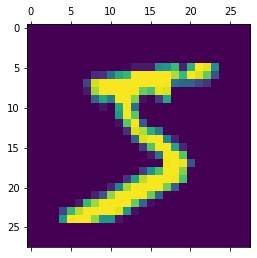

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
# Ubah range data menjadi 0-1
X_train = X_train / 255
X_test = X_test / 255
#value tertinggi 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Flatten array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
# Sebelum di flatten
X_train.shape

(60000, 28, 28)

In [ ]:
# Setelah di flatten, jadi array 1 dimensi
X_train_flattened.shape

(60000, 784)

In [ ]:
# Print flatten array
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9261


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2665 - accuracy: 0.9276


[0.2664901912212372, 0.9276000261306763]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]  

313/313 [==============================] - 0s 1ms/step


array([1.5302531e-02, 2.8229562e-07, 4.5330375e-02, 9.4899482e-01,
       2.3220433e-03, 9.5560037e-02, 1.8777357e-06, 9.9983442e-01,
       1.2061486e-01, 6.3311452e-01], dtype=float32)

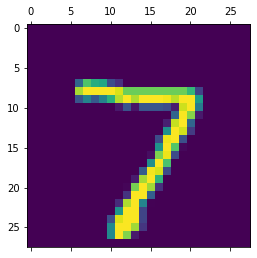

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

7